## Imports

In [208]:
import numpy as np
import uproot
data_dir = "/Users/weisser/MIT_Dropbox/LbVMWeisser_shared/Tracking/Simulated_Velo/LHCbPVFinding_DataSets"
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KernelDensity


In [11]:
f = uproot.open(data_dir+"/Data_ROOT/pvs_weisser.root")
f.classes()
t = f["data"]
t.keys()


['pvr_x',
 'pvr_y',
 'pvr_z',
 'hit_x',
 'hit_y',
 'hit_z',
 'hit_prt',
 'prt_pid',
 'prt_px',
 'prt_py',
 'prt_pz',
 'prt_e',
 'prt_x',
 'prt_y',
 'prt_z']

## Explore

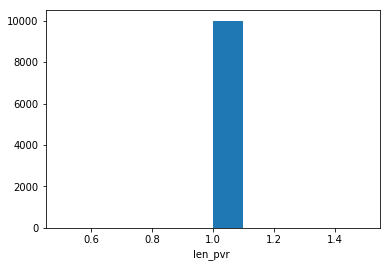

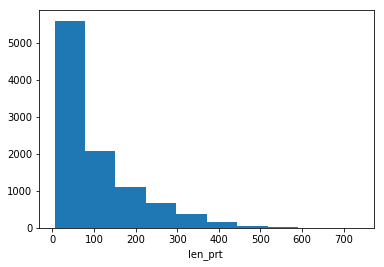

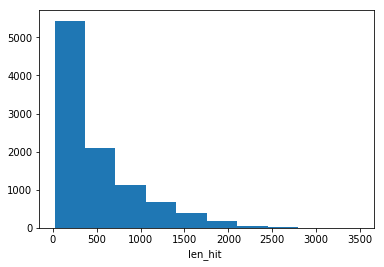

Number of events : 				10000
Average number of pvs per event : 		1.0
Average number of particles per event : 	103.2413
Average number of hits per event : 		508.2261

pvr_z : 
[[ 162.93276121],
 [ 58.44514774],
 [-32.79803724],
 ...,
 [ 125.06719003],
 [ 157.39909016],
 [ 153.89367027]] 

prt_z : 
[[ 162.93276121  162.93276121  162.93276121 ...  -82.55716777  163.2698931   163.2698931 ],
 [ 58.44514774  58.44514774  58.44514774 ...  58.44514774  58.44478239  58.44478239],
 [-32.79803724 -32.79803724 -32.79803724 ...  402.38517894  257.42278889  257.42278889],
 ...,
 [ 125.06719003  125.06719003  125.06719003 ...  201.61397577  125.06542824  125.06542824],
 [ 157.39909016  157.39909016  157.39909016 ...  157.39916006  365.5848589   365.5848589 ],
 [ 153.89367027  153.89367027  153.89367027 ...  153.89367027  194.81977851  194.81977851]] 

hit_z : 
[[ 615.99924868  660.9774781   705.98973092 ...  263.01186     324.96277484  401.98114762],
 [ 212.95756034  238.05362467  262.98961649 ... -2

In [149]:
if False:
    data_dict = t.arrays()
    len_pvr = [len(i) for i in data_dict["pvr_z"]]
    len_prt = [len(i) for i in data_dict["prt_z"]]
    len_hit = [len(i) for i in data_dict["hit_z"]]



    plt.hist(len_pvr)
    plt.xlabel("len_pvr ")
    plt.show()

    plt.hist(len_prt)
    plt.xlabel("len_prt ")
    plt.show()

    plt.hist(len_hit)
    plt.xlabel("len_hit ")
    plt.show()

    print "Number of events : \t\t\t\t", len(data_dict["pvr_z"])
    print "Average number of pvs per event : \t\t", np.average([len(i) for i in data_dict["pvr_z"]])
    print "Average number of particles per event : \t", np.average([len(i) for i in data_dict["prt_z"]])
    print "Average number of hits per event : \t\t", np.average([len(i) for i in data_dict["hit_z"]])

    print "\npvr_z : \n", data_dict["pvr_z"], "\n\nprt_z : \n", data_dict["prt_z"], "\n\nhit_z : \n", data_dict["hit_z"] 

In [209]:
# Simple (2D) Linear Regression. Gaussian uncertainties of std dev beta in y variable. No uncertainties in x variable
# As proxy for x intercept uncertainty take the distance from the x intercept at which the y distance from the x axis 
# corresponds to one standard dev in y (beta).
# If y = m * x + c
# Intercept is at - c / m
# Intercept uncertainty proxy is beta / m

# Look at http://science.widener.edu/svb/stats/regress.html

def linear_regression(x, y):
    
    X = np.array([x]).T
    train_features = X
    train_target = y

    
    if False:
        w = np.dot(train_features.T, train_features)  
        w1 = np.dot(np.linalg.pinv(w), np.dot(train_features.T,train_target))
    
    if False:
        mean_x = np.mean(x);   mean_y = np.mean(y);
        B1 = sum((x(i) - mean_x) * (y(i) - mean_y)) / sum( (x(i) - mean_x)^2 )
        B0 = mean(y) - B1 * mean(x)
        
        beta = 1
        print w1
    
        c = w1[0]
        m = w1[1]
        intercept = - c / m
        intercept_uncertainty = beta / m 
    
    
    if False:
        a = np.linalg.inv(np.dot(X.T,X))
        c = np.dot(X.T,Y)
        b = np.dot(a,c)


    if True:
        mean_x = np.mean(x);   mean_y = np.mean(y);
        N = len(y)
        assert N == len(x)
        s_xx = sum([(x[i]-mean_x)*(x[i]-mean_x) for i in range(N)])
        s_yy = sum([(y[i]-mean_y)*(y[i]-mean_y) for i in range(N)])
        s_xy = sum([(x[i]-mean_x)*(y[i]-mean_y) for i in range(N)])
        
        #print s_xx, s_yy, s_xy
        
        m = s_xy / s_xx
        c = mean_y - m * mean_x
        intercept = mean_x - mean_y / m
        
        #print "m, c, intercept : \t", m, c, intercept
        
        beta = N / sum([(y[i]- c - m*x[i])*(y[i]- c - m*x[i]) for i in range(N)])
        
        s_r = np.sqrt((s_yy - np.square(m)*s_xx)/(N-2) )
        s_y = s_r * np.sqrt(1+1./N + (x-mean_x)**2/s_xx) 
        #s_x = s_r/m * sqrt(1./M + 1./N + (y_unk-mean_y)**2/(m**2*s_xx))
        #print beta
        #print s_r, np.mean(s_y)
        
        beta = np.mean(s_y) #This is not actually correct
        
    
    
    
    
    
    
    intercept_uncertainty = beta / m 
    
    
    return intercept, intercept_uncertainty
    

In [138]:
#Testing the linear regression function
if False:
    
    if True:
        l = [1, 2, 3, 4 ]

        x_train = np.array(l)
        y_train = np.array([2*i + 1 + np.random.normal(loc=0., scale=0.001) for i in l])

    else:
        l = [1, 2, 3, 4 ]
        l1 = [1.5, 2.5]

        x_train = np.array(l+l1)
        y_train = np.array([2*i + 1 + np.random.normal(loc=0., scale=0.001) for i in l] +
                          [3*i + 0.5 + np.random.normal(loc=0., scale=0.001) for i in l1])


    #X_train = np.c_[1, 2, 3, 4 ].T
    #y_train = [3, 5, ]
    X_test = np.c_[0, 2].T
    linear_regression(x_train, y_train)


m, c, intercept : 	2.00012161174 1.00010000625 -0.500019599


(-0.50001959900041371, 0.00067352054345624099)

## Fill Bins

n_skipped / n_total :  1393  /  1695
[ 162.93276121]


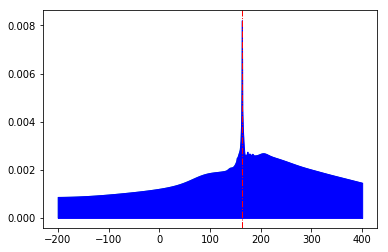

In [307]:
# 0.1 milliradian corresponds to 63000 bins
binning_scheme = [[10, 0],[10, 0.5]]
binning_scheme = [[63000, 0],[63000, 0.5]] # skipped many events
binning_scheme = [[6300, 0],[6300, 0.5]]
# 10, 0.5 means you divide 2 pi into 10 bins. the offset is 0.5 times a bin




counter = 0
#for i in range(len(data_dict["hit_x"])):
for i in range(1):
    counter += 1
    
    bin_contents = []
    for n_binning_scheme, (nbins, offset_bin_frac) in enumerate(binning_scheme):
        bin_contents.append({})
    
    hit_phi = np.arctan2(data_dict["hit_y"][i], data_dict["hit_x"][i])
    hit_r   = np.sqrt(np.square(data_dict["hit_y"][i]) + np.square(data_dict["hit_x"][i]))
    #print hit_phi
    
    ##################################################
    ### FILL BINS
    ##################################################
    for n_binning_scheme in range(len(binning_scheme)):
        nbins, offset_bin_frac = binning_scheme[n_binning_scheme][0], binning_scheme[n_binning_scheme][1]
        #vectorised and no bin definitions necessary
        hit_phi_obs = hit_phi - 2.*np.pi*offset_bin_frac/nbins  #Rotating the bins with angle alpha is the same as rotating the point with angle - alpha
        hit_phi_obs = hit_phi_obs % (2 * np.pi ) # taking care of modulo
        hit_bins = (hit_phi_obs //(2 * np.pi / nbins)).astype(int)
        

        #print hit_phi_obs
        #print len(hit_bins), hit_bins

        for j, b in enumerate(hit_bins):
            #bin_contents[n_binning_scheme][b].append([data_dict["hit_z"][i][j], hit_r[j]])
            if b in bin_contents[n_binning_scheme]:
                bin_contents[n_binning_scheme][b].append([data_dict["hit_z"][i][j], hit_r[j]])
            else:
                bin_contents[n_binning_scheme][b]=[[data_dict["hit_z"][i][j], hit_r[j]]]
                
    #print counter
    #print bin_contents
    
    
    
    ##################################################
    ### DO REGRESSION
    ##################################################
    kernel_inputs_orig = []
    for n_binning_scheme, (nbins, offset_bin_frac) in enumerate(binning_scheme):
        kernel_inputs_orig.append([])

    n_skipped = 0
    n_total   = 0

    for n_binning_scheme in range(len(binning_scheme)):
        nbins, offset_bin_frac = binning_scheme[n_binning_scheme][0], binning_scheme[n_binning_scheme][1]
        for key in bin_contents[n_binning_scheme]:
            n_total +=1
            data = np.array(bin_contents[n_binning_scheme][key])
            #print data.shape[0],
            if (data.shape[0] < 3): n_skipped+=1; continue
            intercept, intercept_uncertainty = linear_regression(data[:, 0], data[:,1])
            #print " intercept, intercept_uncertainty  : ", intercept, intercept_uncertainty
            kernel_inputs_orig[n_binning_scheme].append([intercept, intercept_uncertainty])

    #print kernel_inputs_orig
    print "n_skipped / n_total : ", n_skipped, " / ", n_total
    
    
    ##################################################
    ### KERNEL DENSITY ESTIMATION
    ##################################################
    
    # Neither scipy.stats (gaussian_kde) not sklearn implementations allow to vary bandwidth on a per entry level
    # Had to implement it myself

    x_plot = np.linspace(-200, 400, 1200)
    #x_plot = np.linspace(100, 200, 200)
    #x_plot = np.linspace(-200, 400, 5)
    y_plot = np.zeros(len(x_plot))
    #X_plot = np.linspace(-200, 400, 1200)[:, np.newaxis]

    kernel_inputs = []
    for a in kernel_inputs_orig: kernel_inputs.extend(a)    #flatten binning scheme

    kernel_inputs = np.array(kernel_inputs)
    #print kernel_inputs
    #print "kernel_inputs.shape : ", kernel_inputs.shape
    #print kernel_inputs


    def gaussian(x, mu, sig):
        return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

    for a in range(kernel_inputs.shape[0]):
        y_plot += gaussian(x_plot, kernel_inputs[a,0], kernel_inputs[a,1])


    #Normalise
    # Compute the area using the composite trapezoidal rule.
    area = np.trapz(y_plot, dx=(x_plot[1]- x_plot[0]))
    #area = np.trapz(y_plot, dx=1./len(y_plot)) #Assuming x_max - x_min is 1
    y_plot = y_plot/ area
    #y_plot = y_plot/ np.linalg.norm(y_plot)


    plt.fill_between(x_plot, 0, y_plot)
    
    print data_dict["pvr_z"][i]
    
    plt.axvline(x=data_dict["pvr_z"][i], color='r', lw=1., linestyle = '-.')
    
    plt.fill_between(x_plot, 0, y_plot, color='b')
    
    
    
    
    
    